<a href="https://www.kaggle.com/code/kumailalawa/thridday?scriptVersionId=112469674" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# The Third Day - Machine Learning

## Supervised Learning 
* Classification (the label is avaiable) - Discrete results
* Regression (usr the values to supervise the learning) - Not necessairly discrete results

## Semi-Supervised
* We know the label for some parts of the data

## Self-Supvervised
* Requires lots of pictures (we don't need the labels)

## UnSupervised 

* No labels (focues on clustering, grouping, and dimension reduction)

## Batch & Incremental learning

* Batch learning: Train once and use the model
* Incremental learning: New data points train the model as well

### Linear Regression
1. Cost function (error function): Sum of squares
2. Find the critical point to find the minimum point (the lowest error) by computing the gradient (if 1D, it is just the derivative)

* Gradient = zero (to find the minimum value)

### Non-linear
* Use more complicated model (perhaps a sin, cos, or of a higher power than 1)
* Or transform the data to another dimension (we call them features), then we fit it to a linear model 

### Vectorization
* Transforming the function to a vector

### Cost function of the Vector
* Divide Sum of Square Error (SSE) by the number of samples to obtain the Mean Square Error (MSE)
* Then, use the dot product of the error


* Find theta that would minimize the error

### Error Visualization

* Epsilon is the red line

### Distribution

* The distribution across the training, validation, and testing data should have similar distribution

# Exercise 1

* Expectation: A working solution where the learned function using Linear Regression is close to the training data points. Finding the value of gravity by comparing the equation of motion and the hypthesis function.



1.6333333333333335
[[4.36842105 2.        ]
 [2.         1.        ]]
(2, 2)
[[8.37024382]
 [3.58221607]]
(2, 1)
(2, 1)
[['m'], ['b']]
[[ 3.27291741]
 [-2.96361874]]

The gravity of the moon is: 1.5900278695555703


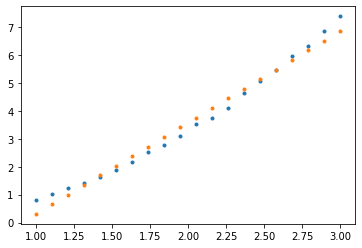

In [2]:
#[Fictional Story] The astronauts on moon wanted to measure the value of gravity on the moon. The decide to throw a spanner 
#from different heights and measure the time needed to cover the distance and based on these values want to extract the value of 
#gravity on moon. The values might be slightly off due to human error and the (very thin) moon atmosphere. Use linear regression to 
#find the value of gravity on the moon.



import matplotlib.pyplot as plt
import numpy as np

gmoon=9.8/6
print(gmoon)
t=np.linspace(1,3,20)
s=0.5*gmoon*t**2 + 0.05*np.random.randn(t.size)


# s = 0.5 * gmoon * t ^2
# t1 ,t2 ..., s1 ,s2 ..., 



# Y = a1 * X1 + a2 * X2 + ...+ an * Xn 
# s = gmoon * (0.5 * t **2)


X = 0.5 * t[:, None] ** 2
Y = s[:, None] # new dimension




















plt.plot(t,s,'.')

# Soln
X = np.array([[(t**2).sum()/len(t), t.sum()/len(t)], 
              [t.sum()/len(t), 1]])
print(X)
print(X.shape)

Y = np.array([[(t*s).sum()/len(t)], 
              [(s).sum()/len(t)]])
print(Y)
print(Y.shape)

theta = np.linalg.inv(X)@Y
print(theta.shape)
print([['m'], ['b']])
print(theta)

regressor = theta[0]*t + theta[1]
plt.plot(t, regressor, '.')

# s = 0.5 * a * t**2 ; if v = 0
# So, a = 2 * s / t**2
a = 2 * regressor / t**2

print(f'\nThe gravity of the moon is: {np.average(a)}')

# Exercise 2

* Expectation: A working solution where the learned function using Linear Regression is close to the training data points.

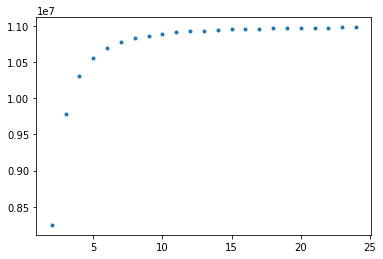

In [3]:
#[Fictional Story] The data for the hydrogen spectrum was provided to a statistcain and he/She decided to use linear regression
#model for finding the relation between the hydrogen spectrum and the hydrogen shell. The statistican wants to find the relatioship between 
#the shell from which the electron jumps (ni) to the first shell and the spatial frequency (sf). He/She tries to fit 2-7 order polynomial to the data.

# Linear model: find the slope and the bais

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

ni=np.arange(2,25) # data features (X)

sf=[(1.1*10**7)*(1/(1)**2 -1/(i)**2) for i in ni] # data model (y)
plt.plot(ni,sf,'.')
# from the distribution we have found that the data is not linear so that we hvae to transform the data so that it becomes linear
# we will be using polynomial function (if it does not work, try a another function or higher order)

# we will be using taylor series



# Soln
# regressor = np.polyfit(ni, sf, 24)

# plt.plot(ni, regressor)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
def plotClass(X,y,p):
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)
            


(2, 200)
(1, 200)
[-0.93757936] [1.88029747]
[ 4.69303555  4.59927762  4.50551968  4.41176174  4.31800381  4.22424587
  4.13048794  4.03673     3.94297206  3.84921413  3.75545619  3.66169826
  3.56794032  3.47418238  3.38042445  3.28666651  3.19290858  3.09915064
  3.0053927   2.91163477  2.81787683  2.7241189   2.63036096  2.53660302
  2.44284509  2.34908715  2.25532922  2.16157128  2.06781334  1.97405541
  1.88029747  1.78653954  1.6927816   1.59902366  1.50526573  1.41150779
  1.31774986  1.22399192  1.13023398  1.03647605  0.94271811  0.84896018
  0.75520224  0.6614443   0.56768637  0.47392843  0.3801705   0.28641256
  0.19265463  0.09889669  0.00513875 -0.08861918 -0.18237712 -0.27613505
 -0.36989299 -0.46365093 -0.55740886 -0.6511668  -0.74492473 -0.83868267
 -0.93244061 -1.02619854 -1.11995648 -1.21371441 -1.30747235 -1.40123029
 -1.49498822 -1.58874616 -1.68250409 -1.77626203 -1.87001997 -1.9637779
 -2.05753584 -2.15129377 -2.24505171 -2.33880965 -2.43256758 -2.52632552
 -2.620

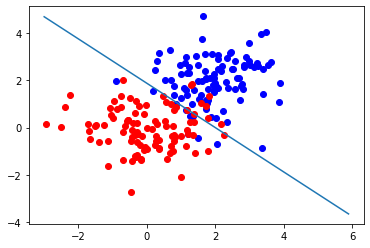

In [6]:
from sklearn import linear_model

num_data=100 # data points per class

x1=np.random.randn(2,num_data)+2
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
plotClass(X,y,'o')
# print(X)
print(X.shape)
print(y.shape)


logistic = linear_model.LogisticRegression()
logistic.fit(X.T,y.squeeze())

b = logistic.intercept_

w1, w2 = logistic.coef_.T

c = -b/w2

m = -w1/w2

print(m,c)

newLine = m*[x/10 for x in range(-30,60)] + c

print(newLine)

plt.plot([x/10 for x in range(-30,60)], newLine)